In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold,  cross_val_score

In [23]:
# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [24]:
df


,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
x = df.drop(['diabetes'], axis=1)

In [26]:
x

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [27]:
y = df['diabetes']

In [28]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [29]:
scaler = StandardScaler()

In [30]:
scaler_x = scaler.fit_transform(x)

In [31]:
scaled_x = pd.DataFrame(scaler_x, columns = x.columns)

In [32]:
scaled_x

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


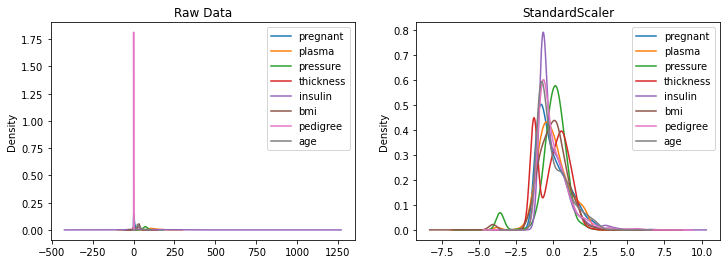

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
x.plot(kind='kde', title='Raw Data', ax=ax[0])

scaled_x.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

In [42]:
# 학습셋과 테스트셋을 75:25의 비율로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =0)

In [44]:
print(x_train.shape)
print(x_test.shape)

(576, 8)
(192, 8)


# Decision Tree - 모형이해가 쉬움 비모수적 모형임 

In [46]:
from sklearn.tree  import DecisionTreeClassifier  # 결정 트리 분류기를 불러옵니다.


In [50]:
Classifier = DecisionTreeClassifier()

In [51]:
Classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred = Classifier.predict(x_test)

In [56]:
skf = StratifiedKFold(n_splits=10, shuffle=True)

In [58]:
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = skf)

In [61]:
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 68.07 %
Standard Deviation : 5.54 %


#  Ramdom Forest - 앙상블 디시전 트리를 여러개 생성하는 것 ! 

In [72]:
from sklearn.ensemble import RandomForestClassifier
Classifier =RandomForestClassifier(n_estimators = 100)
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = skf)

In [73]:
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.67 %
Standard Deviation : 3.54 %


# 가우시안 나이브 베이즈  확률에 따른 추론

In [74]:
from sklearn.naive_bayes import GaussianNB
Classifier = GaussianNB()
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = skf)

In [75]:
print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.84 %
Standard Deviation : 4.30 %


# K-NN - 최근접한 것들을 찾아서 분류시키기

In [76]:
from sklearn.neighbors import KNeighborsClassifier
Classifier =  KNeighborsClassifier()
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 70.99 %
Standard Deviation : 6.78 %


# AdaBoost 이것도 앙상블 가중치 붙히는 것

In [77]:
from sklearn.ensemble import AdaBoostClassifier
Classifier =  AdaBoostClassifier()
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 73.43 %
Standard Deviation : 4.93 %


# 이차 판별 분석 - QDA

In [78]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
Classifier =  QuadraticDiscriminantAnalysis()
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 73.77 %
Standard Deviation : 3.66 %


# SVM - 정확도는 높지만 느림

In [79]:
from sklearn.svm import SVC
Classifier =  SVC(kernel='linear')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 75.70 %
Standard Deviation : 3.10 %


# SVM - RBF 비선형

In [80]:
from sklearn.svm import SVC
Classifier =  SVC(kernel='rbf')
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 75.18 %
Standard Deviation : 3.44 %


# voting - 여러가지 모델을 학습시켜서 가장 잘 시킨것 뽑기

In [81]:
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel = 'linear')

Classifier =  VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)])
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 76.22 %
Standard Deviation : 3.52 %


# Bagging - 틀린 것에 가중치를 주는 것

In [82]:
from sklearn.ensemble import BaggingClassifier
Classifier =   BaggingClassifier(base_estimator=SVC(kernel = 'rbf'), n_estimators=10)
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator = Classifier, X = x_train, y = y_train, cv = skf)

print("Accuracy : {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f} %".format(accuracies.std()*100))

Accuracy : 74.48 %
Standard Deviation : 4.51 %


# 여러 알고리즘 성능을 한눈에 비교하기

In [ ]:
# 사용할 분류기를 모두 지정합니다.
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel = 'linear'),
               SVC(kernel = 'rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()), 
                                            ('2', RandomForestClassifier()), 
                                            ('3', SVC(kernel = 'linear'))]),
               BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)
              ]

# 각 분류기의 이름을 지정합니다. 
classifier_names = ['D_tree',
                    'RF', 
                    'GNB', 
                    'KNN', 
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k',
                    'Voting',
                    'Bagging'
                   ]

# 결과가 저장될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행하여 결과를 저장합니다. 
classifier_data=zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    # 계층별 교차 검증 환경을 설정합니다. 
    skf=StratifiedKFold(n_splits=10, shuffle=True)
    # 교차 검증을 통해 정확도를 계산합니다. 
    accuracies=cross_val_score(classifier, X = x_train, y = y_train, cv = skf)
    # 정확도의 평균값을 출력합니다.
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    # 결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

# 각 분류기별 정확도의 평균값을 막대 그래프로 출력합니다.
plt.figure(figsize=(10,5))    
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans);

# 각 분류기별 결과를 Box 그래프로 출력합니다.
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

Mean accuracy of D_tree : 67.52 %
Mean accuracy of RF : 72.91 %
Mean accuracy of GNB : 73.81 %
Mean accuracy of KNN : 69.26 %
Mean accuracy of Ada : 74.67 %
Mean accuracy of QDA : 74.82 %
Mean accuracy of SVM_l : 73.58 %
Mean accuracy of SVM_k : 72.91 %
